<a href="https://colab.research.google.com/github/freddy120/heartfailure_vys/blob/main/Proyecto_Final_VyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final Visualización y Storytelling

Dataset link: https://www.kaggle.com/fedesoriano/heart-failure-prediction


In [26]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt


In [27]:
heart_df = pd.read_csv("heart.csv")
print('Dimension dataset: ', heart_df.shape)

Dimension dataset:  (918, 12)


In [28]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
heart_df.columns.to_list()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [30]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [31]:
numeric_features = heart_df.select_dtypes(exclude=['category', object]).columns.values 
categorical_features = heart_df.select_dtypes(include=['category', object]).columns.values

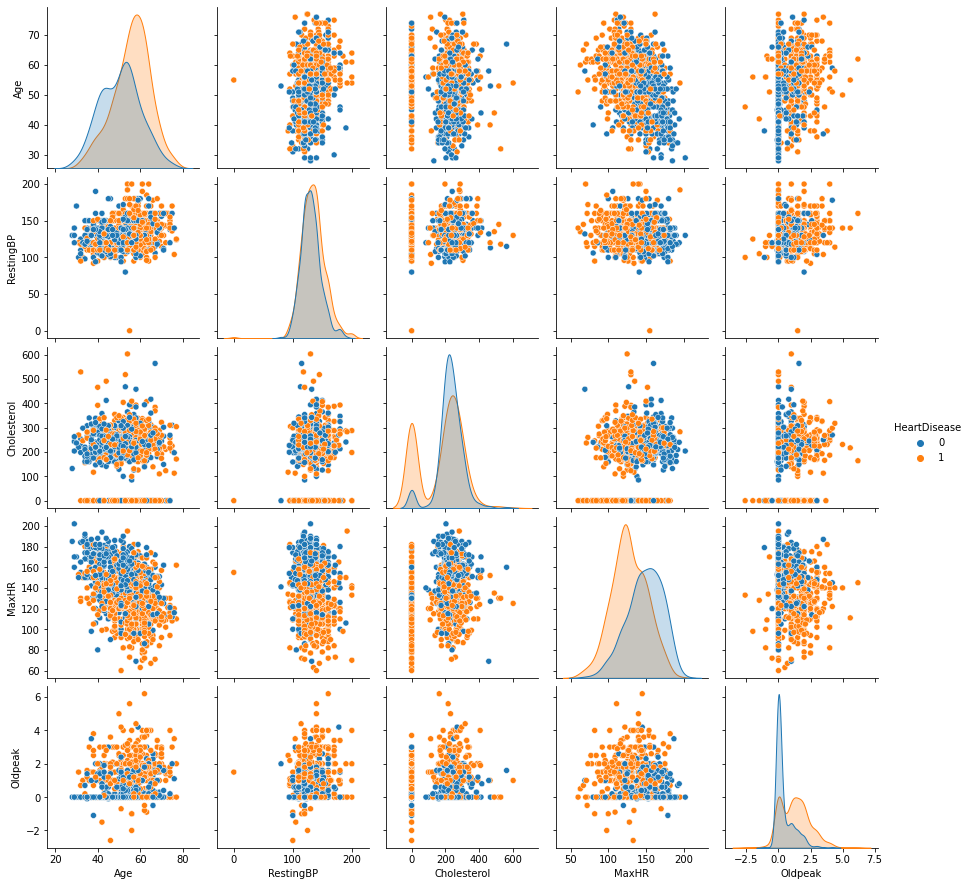

In [32]:
sns.pairplot(heart_df[numeric_features[~np.isin(numeric_features, ['FastingBS'])]], hue='HeartDisease')

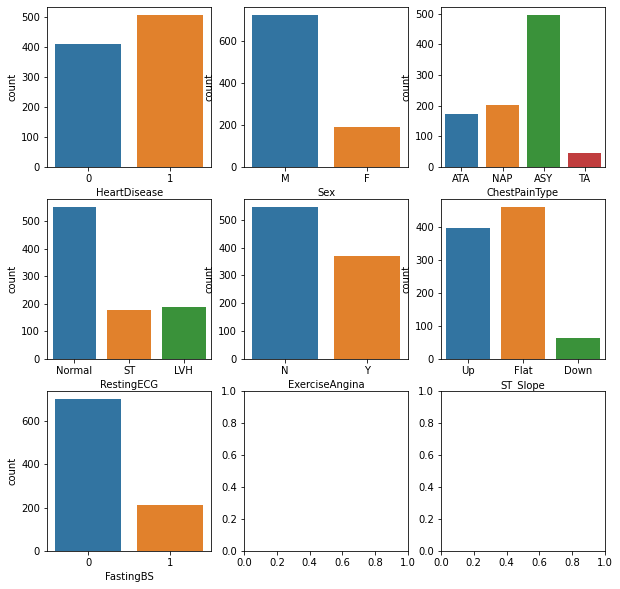

In [33]:
fig, axes=plt.subplots(3,3, figsize=(10, 10))
sns.countplot(x = 'HeartDisease', data = heart_df, ax=axes[0,0])
sns.countplot(x = 'Sex', data = heart_df, ax=axes[0,1])
sns.countplot(x = 'ChestPainType', data = heart_df, ax=axes[0,2])
sns.countplot(x = 'RestingECG', data = heart_df, ax=axes[1,0])
sns.countplot(x = 'ExerciseAngina', data = heart_df, ax=axes[1,1])
sns.countplot(x = 'ST_Slope', data = heart_df, ax=axes[1,2])
sns.countplot(x = 'FastingBS', data = heart_df, ax=axes[2,0])

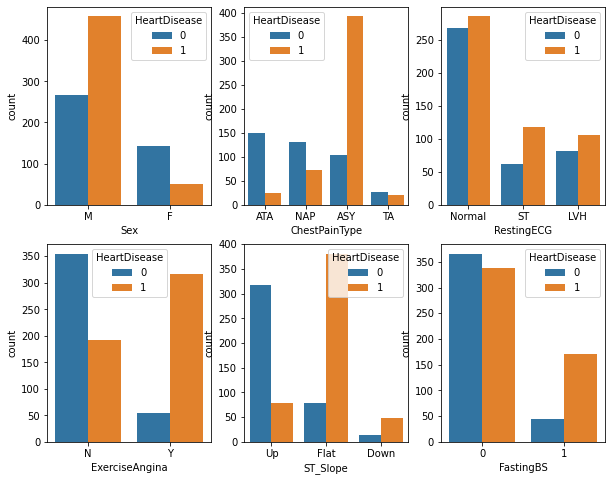

In [34]:
fig, axes=plt.subplots(2,3, figsize=(10, 8))
sns.countplot(x = 'Sex', data = heart_df, ax=axes[0,0], hue='HeartDisease')
sns.countplot(x = 'ChestPainType', data = heart_df, ax=axes[0,1], hue='HeartDisease')
sns.countplot(x = 'RestingECG', data = heart_df, ax=axes[0,2], hue='HeartDisease')
sns.countplot(x = 'ExerciseAngina', data = heart_df, ax=axes[1,0], hue='HeartDisease')
sns.countplot(x = 'ST_Slope', data = heart_df, ax=axes[1,1], hue='HeartDisease')
sns.countplot(x = 'FastingBS', data = heart_df, ax=axes[1,2], hue='HeartDisease')

## Modelar los datos

* Análisis exploratorio preliminar.
* Limpieza de datos, eliminación de registros con datos nulos.
* Eliminación de registros duplicados.
* Traducción de variables del inglés al español.




In [35]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [36]:
heart_df = heart_df.dropna()
heart_df = heart_df.drop_duplicates()

In [37]:
heart_df.shape

(918, 12)

In [39]:
heart_df = heart_df.rename(columns = {'Age': 'Edad', 'Sex': 'Sexo', 'ChestPainType': 'Dolor de pecho', 
                                      'RestingBP': 'Presión arterial en reposo', 'Cholesterol': 'Colesterol total', 
                                      'FastingBS': 'Glucosa sanguínea en ayunas', 'RestingECG': 'EEG en reposo', 
                                      'MaxHR': 'Max Frecuencia cardíaca', 'ExerciseAngina': 'Angina de ejercicio', 
                                      'Oldpeak': 'Depresión del ST inducida', 'ST_Slope': 'Pendiente ST', 'HeartDisease': 'Enfermedad cardíaca'}, inplace = False)


## Guardar nuevo archivo procesado

*   Guardar la base de datos procesada en un formato csv para luego ser cargado a google data studio.



In [41]:
heart_df.to_csv('heart_procesado.csv',  index=False)